<a href="https://colab.research.google.com/github/Nukaraju2003/jyothimam/blob/main/Accuracy_and_performance_MSE%2CRMSE%2C_CorrelationJyothiMam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pearson Correlation Coefficient

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
human_gr = pd.read_csv('/content/drive/MyDrive/Jyothi Mam/correlation/scaled_output_final.csv')

ai_gr = pd.read_csv('/content/drive/MyDrive/Jyothi Mam/correlation/human rating for pretrained models.csv')

dfh = human_gr

dfa = ai_gr

In [4]:
dfh.shape

(88, 13)

In [5]:
dfa.shape

(88, 13)

In [6]:
dfa.isnull().sum()

Participant           0
Fluency               0
Clarity               0
Confidence            0
Enthusiasm            0
Unique qualities      0
Professionalism       0
Engagement            0
Structured Answers    0
No Fillers            0
Focused               0
Authentic             0
Overall               0
dtype: int64

In [7]:
dfh.isnull().sum()

Participant           0
Fluency               0
Clarity               0
Confidence            0
Enthusiasm            0
Unique qualities      0
Professionalism       0
Engagement            0
Structured Answers    0
No Fillers            0
Focused               0
Authentic             0
Overall               0
dtype: int64

In [8]:
dfh.dropna(inplace=True)

In [9]:
dfa.dropna(inplace=True)

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

In [11]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Participant         88 non-null     int64
 1   Fluency             88 non-null     int64
 2   Clarity             88 non-null     int64
 3   Confidence          88 non-null     int64
 4   Enthusiasm          88 non-null     int64
 5   Unique qualities    88 non-null     int64
 6   Professionalism     88 non-null     int64
 7   Engagement          88 non-null     int64
 8   Structured Answers  88 non-null     int64
 9   No Fillers          88 non-null     int64
 10  Focused             88 non-null     int64
 11  Authentic           88 non-null     int64
 12  Overall             88 non-null     int64
dtypes: int64(13)
memory usage: 9.1 KB


In [12]:
dfh.head()

,Participant,Fluency,Clarity,Confidence,Enthusiasm,Unique qualities,Professionalism,Engagement,Structured Answers,No Fillers,Focused,Authentic,Overall
0,1,6,5,5,4,4,5,6,7,6,8,6,6
1,2,6,5,5,4,3,5,4,4,6,4,5,5
2,3,6,5,5,5,6,5,5,6,5,6,6,6
3,4,7,7,7,6,6,7,6,7,8,7,7,6
4,8,7,7,7,6,6,7,6,7,8,7,7,7


In [13]:
dfh.describe()

,Participant,Fluency,Clarity,Confidence,Enthusiasm,Unique qualities,Professionalism,Engagement,Structured Answers,No Fillers,Focused,Authentic,Overall
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,142.625000,5.806818,5.681818,5.625000,5.000000,4.579545,5.829545,4.988636,5.193182,5.704545,5.500000,5.681818,5.306818
std,89.355587,1.515119,1.664680,1.577955,1.500958,1.652039,1.723546,1.758358,1.952646,1.966145,1.850753,1.712332,1.834271
min,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000
25%,43.250000,5.000000,5.000000,5.000000,4.000000,3.750000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000
50%,150.500000,6.000000,6.000000,6.000000,5.000000,4.000000,6.000000,5.000000,5.000000,6.000000,5.500000,6.000000,5.000000
75%,213.500000,7.000000,7.000000,7.000000,6.000000,6.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000
max,285.000000,9.000000,8.000000,8.000000,8.000000,8.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [14]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Participant         88 non-null     int64
 1   Fluency             88 non-null     int64
 2   Clarity             88 non-null     int64
 3   Confidence          88 non-null     int64
 4   Enthusiasm          88 non-null     int64
 5   Unique qualities    88 non-null     int64
 6   Professionalism     88 non-null     int64
 7   Engagement          88 non-null     int64
 8   Structured Answers  88 non-null     int64
 9   No Fillers          88 non-null     int64
 10  Focused             88 non-null     int64
 11  Authentic           88 non-null     int64
 12  Overall             88 non-null     int64
dtypes: int64(13)
memory usage: 9.1 KB


In [15]:
dfa.head()

,Participant,Fluency,Clarity,Confidence,Enthusiasm,Unique qualities,Professionalism,Engagement,Structured Answers,No Fillers,Focused,Authentic,Overall
0,1,6,5,5,4,4,5,6,7,6,8,6,6
1,2,6,5,5,4,4,5,4,5,6,4,5,5
2,3,6,5,5,5,6,5,5,6,5,6,6,6
3,4,7,8,7,6,6,7,6,8,8,7,7,6
4,8,7,7,7,7,6,7,6,7,8,8,7,7


In [16]:
dfa.describe()

,Participant,Fluency,Clarity,Confidence,Enthusiasm,Unique qualities,Professionalism,Engagement,Structured Answers,No Fillers,Focused,Authentic,Overall
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,142.625000,5.806818,5.681818,5.613636,5.034091,4.863636,5.772727,5.102273,5.488636,5.772727,5.613636,5.715909,5.568182
std,89.355587,1.413059,1.615624,1.564196,1.433979,1.547574,1.638104,1.728994,1.741939,1.861450,1.751399,1.646654,1.666405
min,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000
25%,43.250000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000
50%,150.500000,6.000000,6.000000,6.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,213.500000,7.000000,7.000000,7.000000,6.000000,6.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000
max,285.000000,9.000000,8.000000,8.000000,8.000000,8.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Assuming dfh and dfa are your DataFrames containing human and AI marks respectively

# List of parameters
parameters = ['Enthusiasm', 'Confidence', 'Focused', 'Fluency', 'Unique qualities', 'Overall', 'Professionalism', 'Engagement', 'Clarity', 'No Fillers', 'Authentic', 'Structured Answers']

# Initialize lists to store MSE and RMSE for each parameter
mse_list = []
rmse_list = []
p_values = []

# Iterate over each parameter
for parameter in parameters:
    # Extract human and AI marks for the parameter
    human_marks = dfh[parameter]
    ai_marks = dfa[parameter]

    # Handle missing values if any
    imputer = SimpleImputer(strategy='mean')  # Impute missing values with mean
    human_marks = imputer.fit_transform(human_marks.values.reshape(-1, 1)).flatten()
    ai_marks = imputer.transform(ai_marks.values.reshape(-1, 1)).flatten()

    # Normalize data
    scaler = StandardScaler()
    human_marks_scaled = scaler.fit_transform(human_marks.reshape(-1, 1)).flatten()
    ai_marks_scaled = scaler.transform(ai_marks.reshape(-1, 1)).flatten()

    # Calculate MSE
    mse = mean_squared_error(human_marks_scaled, ai_marks_scaled)
    mse_list.append(mse)

    # Calculate RMSE
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    # Calculate p-value for statistical significance
    _, p_value = stats.ttest_rel(human_marks_scaled, ai_marks_scaled)
    p_values.append(p_value)

# Print MSE, RMSE, and p-value for each parameter
# for i, parameter in enumerate(parameters):
#     print(f"{parameter}:")
#     print("  Mean Squared Error (MSE):", mse_list[i])
#     print("  Root Mean Squared Error (RMSE):", rmse_list[i])
#     print("  p-value for Statistical Significance:", p_values[i])

# Calculate the mean of MSE, RMSE, and p-value
mean_mse = np.mean(mse_list)
mean_rmse = np.mean(rmse_list)
mean_p_value = np.mean(p_values)

# Print the mean values
print("Mean of all parameters:")
print("  Mean Squared Error (MSE):", mean_mse)
print("  Root Mean Squared Error (RMSE):", mean_rmse)
print("  Mean p-value for Statistical Significance:", mean_p_value)




Mean of all parameters:
  Mean Squared Error (MSE): 0.0788306491508939
  Root Mean Squared Error (RMSE): 0.27115099812376575
  Mean p-value for Statistical Significance: 0.32996649390932986


In [18]:
# Get the common columns between the two datasets
common_cols = set(dfh.columns).intersection(set(dfa.columns))

In [19]:
# Compare the common columns between the two datasets
for col in common_cols:
    if dfh[col].equals(dfa[col]):
        print(f"{col} columns are the same")
    else:
        print(f"{col} columns are different")

Authentic columns are different
No Fillers columns are different
Professionalism columns are different
Participant columns are the same
Clarity columns are different
Structured Answers columns are different
Confidence columns are different
Engagement columns are different
Focused columns are different
Unique qualities columns are different
Fluency columns are different
Enthusiasm columns are different
Overall columns are different


In [20]:
# Get the common columns between the two datasets
common_cols = set(dfh.columns).intersection(set(dfa.columns))

# Calculate the correlation between the common columns
correlation_values = []
for col in common_cols:
    correlation = dfh[col].corr(dfa[col]).round(2)
    correlation_values.append(correlation)
    print(f"Correlation between {col} columns: {correlation}")

# Calculate the average correlation
average_correlation = sum(correlation_values) / len(correlation_values)
print(f"Average correlation: {average_correlation}")


Correlation between Authentic columns: 0.97
Correlation between No Fillers columns: 0.98
Correlation between Professionalism columns: 0.98
Correlation between Participant columns: 1.0
Correlation between Clarity columns: 0.97
Correlation between Structured Answers columns: 0.93
Correlation between Confidence columns: 0.98
Correlation between Engagement columns: 0.98
Correlation between Focused columns: 0.98
Correlation between Unique qualities columns: 0.93
Correlation between Fluency columns: 0.97
Correlation between Enthusiasm columns: 0.96
Correlation between Overall columns: 0.94
Average correlation: 0.9669230769230768


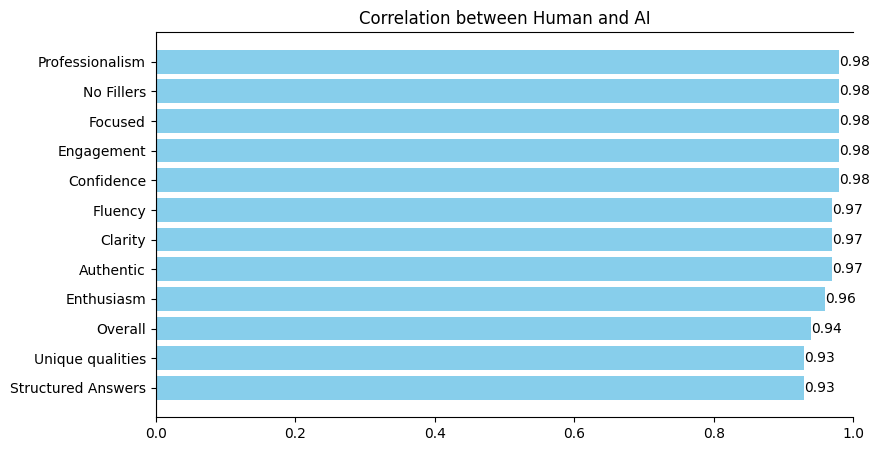

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average correlation values
average_correlation = [0.96, 0.98, 0.98, 0.97, 0.93, 0.94, 0.98, 0.98, 0.97, 0.98, 0.97, 0.93]

# Parameters
parameters = ['Enthusiasm', 'Confidence', 'Focused', 'Fluency', 'Unique qualities', 'Overall', 'Professionalism', 'Engagement', 'Clarity', 'No Fillers', 'Authentic', 'Structured Answers']

# Sort parameters and average_correlation in descending order of correlation
sorted_data = sorted(zip(average_correlation, parameters))
average_correlation, parameters = zip(*sorted_data)

plt.figure(figsize=(9, 5))
bars = plt.barh(parameters, average_correlation, color='skyblue')

plt.title('Correlation between Human and AI')

# Set the limit for the x-axis
plt.xlim(0, 1)

# Add vertical line at x=0
plt.axvline(x=0, color='grey', linewidth=0.8)

# Move the spines
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['right'].set_color('none')

# Add label values to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center')

# Show the plot
plt.show()


Text(0, 0.5, 'Correlation')

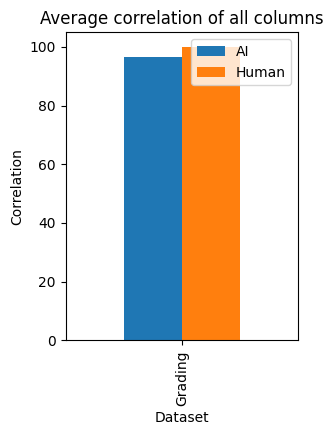

In [22]:
import pandas as pd

plotdata = pd.DataFrame({

    "AI":[96.6],

    "Human":[100]},

    index=["Grading"])

plotdata.plot(kind="bar",figsize=(3, 4))

plt.title("Average correlation of all columns")

plt.xlabel("Dataset")

plt.ylabel("Correlation")

## Histogram: The distribution of scores given by humans and AI for different aspects like Fluency, Clarity, etc

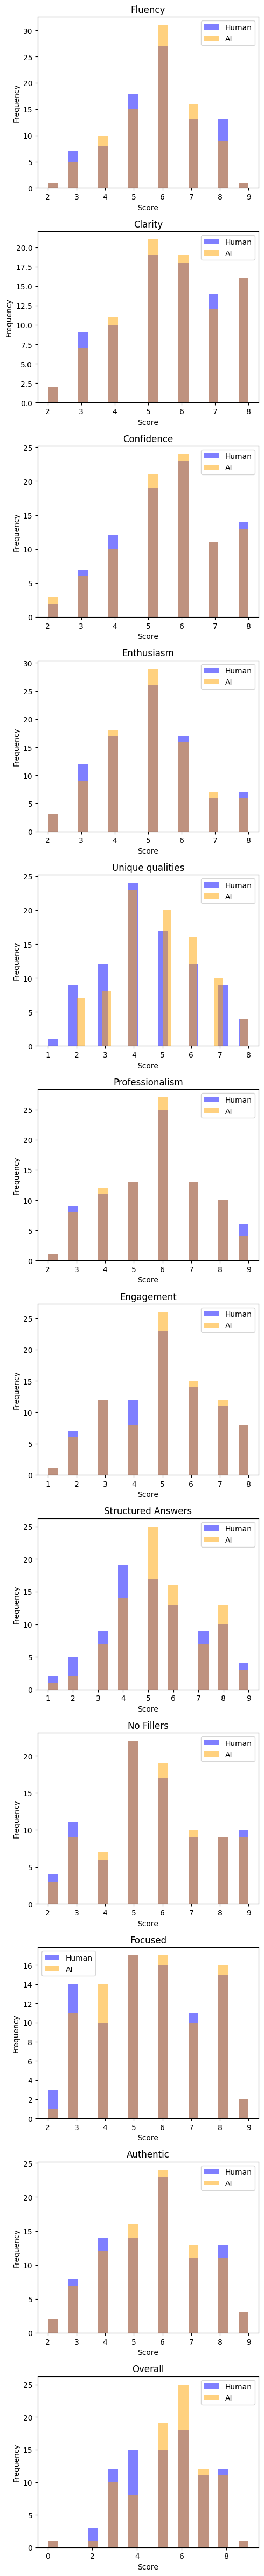

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


# List of parameters
parameters = ['Fluency', 'Clarity', 'Confidence', 'Enthusiasm', 'Unique qualities',
              'Professionalism', 'Engagement', 'Structured Answers', 'No Fillers',
              'Focused', 'Authentic', 'Overall']

# Create subplots for each parameter
fig, axes = plt.subplots(nrows=len(parameters), ncols=1, figsize=(5, 4*len(parameters)))

# Iterate over each parameter
for i, parameter in enumerate(parameters):
    # Plot human scores
    axes[i].hist(dfh[parameter], bins=20, alpha=0.5, color='blue', label='Human')
    # Plot AI scores
    axes[i].hist(dfa[parameter], bins=20, alpha=0.5, color='orange', label='AI')
    # Set title and labels
    axes[i].set_title(parameter)
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


##  violin plots illustrating the distribution of human and AI scores across various parameters

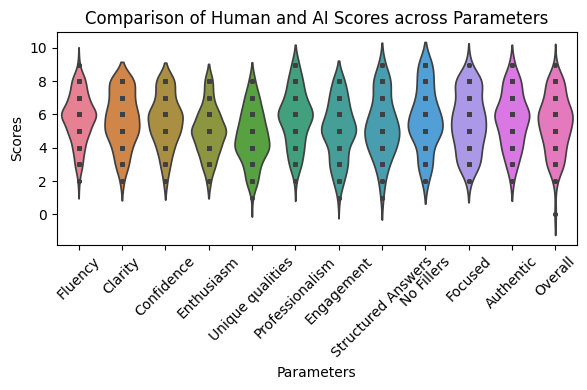

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# List of parameters
parameters = ['Fluency', 'Clarity', 'Confidence', 'Enthusiasm', 'Unique qualities',
              'Professionalism', 'Engagement', 'Structured Answers', 'No Fillers',
              'Focused', 'Authentic', 'Overall']

# Create a violin plot for each parameter
plt.figure(figsize=(6, 4))
sns.set_palette("husl")  # Set color palette
sns.violinplot(data=pd.concat([dfh[parameters], dfa[parameters]], axis=0, keys=['Human', 'AI']), inner='point')
plt.title('Comparison of Human and AI Scores across Parameters')
plt.xlabel('Parameters')
plt.ylabel('Scores')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [23]:
common_cols = ["Engagement", "Enthusiasm", "Structured Answers", "Confidence",
               "Unique qualities", "Professionalism", "Participant",
               "No Fillers", "Clarity", "Fluency", "Authentic",
               "Focused", "Overall"]
# select only the common columns from each dataset
df1_common = dfh[common_cols]
df2_common = dfa[common_cols]
# calculate the correlation matrix for each dataset
corr1 = df1_common.corr().round(2)
corr2 = df2_common.corr().round(2)


In [24]:
corr1

,Engagement,Enthusiasm,Structured Answers,Confidence,Unique qualities,Professionalism,Participant,No Fillers,Clarity,Fluency,Authentic,Focused,Overall
Engagement,1.00,0.92,0.87,0.88,0.89,0.92,-0.05,0.86,0.87,0.84,0.90,0.90,0.79
Enthusiasm,0.92,1.00,0.88,0.92,0.91,0.94,-0.06,0.87,0.90,0.88,0.92,0.90,0.76
Structured Answers,0.87,0.88,1.00,0.83,0.89,0.86,-0.04,0.90,0.84,0.78,0.86,0.91,0.78
Confidence,0.88,0.92,0.83,1.00,0.86,0.94,-0.08,0.87,0.94,0.93,0.94,0.90,0.77
Unique qualities,0.89,0.91,0.89,0.86,1.00,0.87,-0.06,0.84,0.84,0.78,0.87,0.89,0.78
Professionalism,0.92,0.94,0.86,0.94,0.87,1.00,-0.07,0.91,0.94,0.93,0.95,0.91,0.79
Participant,-0.05,-0.06,-0.04,-0.08,-0.06,-0.07,1.00,-0.05,-0.10,-0.14,-0.08,-0.14,-0.16
No Fillers,0.86,0.87,0.90,0.87,0.84,0.91,-0.05,1.00,0.87,0.85,0.90,0.88,0.79
Clarity,0.87,0.90,0.84,0.94,0.84,0.94,-0.10,0.87,1.00,0.92,0.92,0.89,0.81
Fluency,0.84,0.88,0.78,0.93,0.78,0.93,-0.14,0.85,0.92,1.00,0.91,0.86,0.77


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

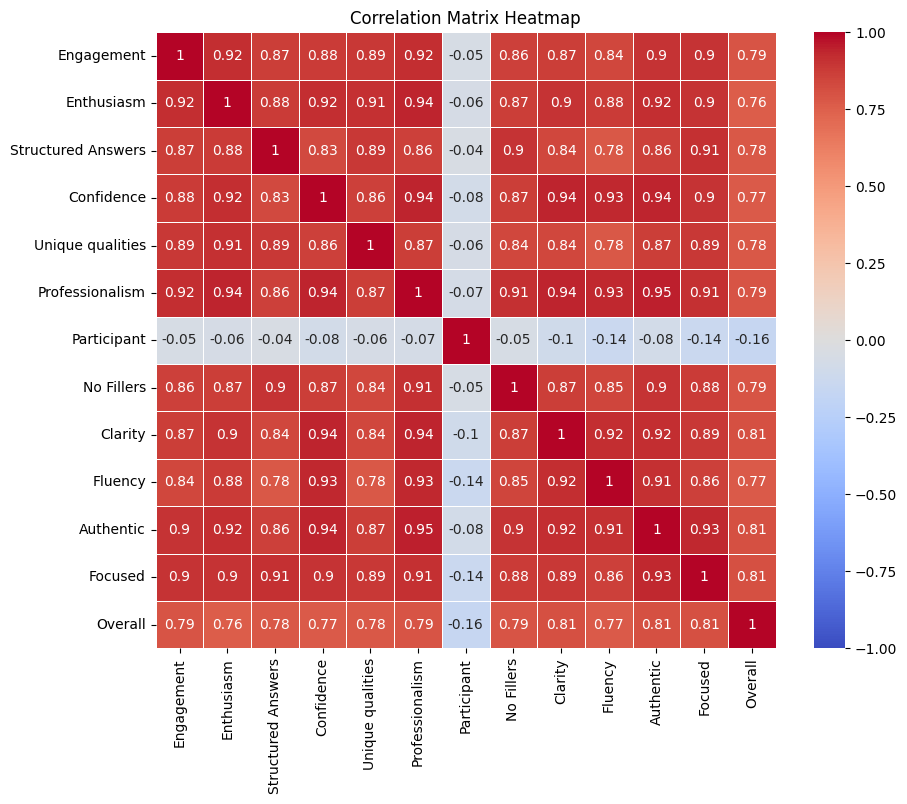

In [25]:
# plot the heatmap for the first dataset
plt.figure(figsize=(10, 8))
plot =sns.heatmap(corr1, cmap="coolwarm", annot=True, vmin = -1, vmax = 1, linewidth = 0.5)
plot.set_title('Correlation Matrix Heatmap')


In [26]:
corr2

,Engagement,Enthusiasm,Structured Answers,Confidence,Unique qualities,Professionalism,Participant,No Fillers,Clarity,Fluency,Authentic,Focused,Overall
Engagement,1.00,0.89,0.84,0.86,0.87,0.88,-0.08,0.85,0.83,0.81,0.87,0.88,0.79
Enthusiasm,0.89,1.00,0.84,0.91,0.85,0.92,-0.11,0.86,0.87,0.87,0.88,0.88,0.73
Structured Answers,0.84,0.84,1.00,0.82,0.85,0.83,-0.08,0.87,0.82,0.78,0.84,0.88,0.75
Confidence,0.86,0.91,0.82,1.00,0.83,0.93,-0.08,0.87,0.92,0.93,0.92,0.88,0.77
Unique qualities,0.87,0.85,0.85,0.83,1.00,0.82,-0.13,0.82,0.80,0.77,0.85,0.86,0.76
Professionalism,0.88,0.92,0.83,0.93,0.82,1.00,-0.08,0.89,0.92,0.90,0.93,0.89,0.78
Participant,-0.08,-0.11,-0.08,-0.08,-0.13,-0.08,1.00,-0.08,-0.13,-0.16,-0.11,-0.16,-0.16
No Fillers,0.85,0.86,0.87,0.87,0.82,0.89,-0.08,1.00,0.86,0.83,0.90,0.87,0.78
Clarity,0.83,0.87,0.82,0.92,0.80,0.92,-0.13,0.86,1.00,0.90,0.88,0.85,0.79
Fluency,0.81,0.87,0.78,0.93,0.77,0.90,-0.16,0.83,0.90,1.00,0.88,0.86,0.78


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

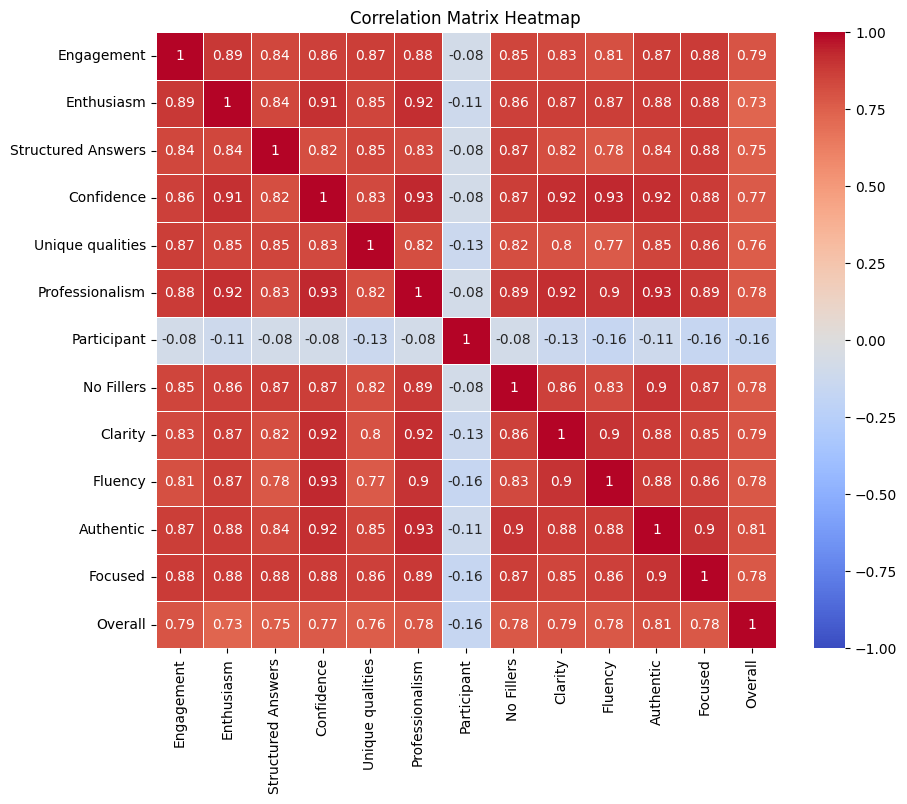

In [27]:
# plot the heatmap for the second dataset
plt.figure(figsize=(10, 8))
plot =sns.heatmap(corr2, cmap="coolwarm", annot=True, vmin = -1, vmax = 1, linewidth = 0.5)
plot.set_title('Correlation Matrix Heatmap')


In [28]:
#regression graph

In [29]:
matrix = np.triu(corr1)
matrix

array([[ 1.  ,  0.92,  0.87,  0.88,  0.89,  0.92, -0.05,  0.86,  0.87,
         0.84,  0.9 ,  0.9 ,  0.79],
       [ 0.  ,  1.  ,  0.88,  0.92,  0.91,  0.94, -0.06,  0.87,  0.9 ,
         0.88,  0.92,  0.9 ,  0.76],
       [ 0.  ,  0.  ,  1.  ,  0.83,  0.89,  0.86, -0.04,  0.9 ,  0.84,
         0.78,  0.86,  0.91,  0.78],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  0.86,  0.94, -0.08,  0.87,  0.94,
         0.93,  0.94,  0.9 ,  0.77],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.87, -0.06,  0.84,  0.84,
         0.78,  0.87,  0.89,  0.78],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.07,  0.91,  0.94,
         0.93,  0.95,  0.91,  0.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.05, -0.1 ,
        -0.14, -0.08, -0.14, -0.16],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.87,
         0.85,  0.9 ,  0.88,  0.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.92,  0.92,  0.89,  0.81],
       [ 0.  ,  0.  ,  0.  ,

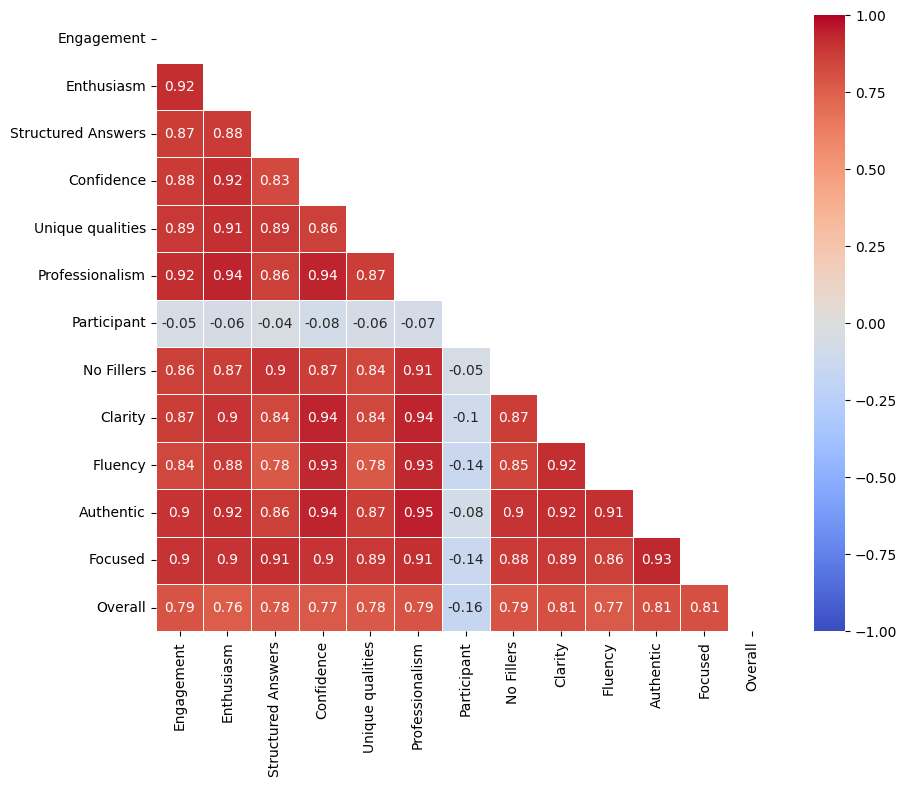

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(corr1, mask = matrix, annot=True, cmap='coolwarm', vmin = -1, vmax = 1, linewidth = 0.5 )
plt.show()

In [31]:
matrix = np.triu(corr2)
matrix

array([[ 1.  ,  0.89,  0.84,  0.86,  0.87,  0.88, -0.08,  0.85,  0.83,
         0.81,  0.87,  0.88,  0.79],
       [ 0.  ,  1.  ,  0.84,  0.91,  0.85,  0.92, -0.11,  0.86,  0.87,
         0.87,  0.88,  0.88,  0.73],
       [ 0.  ,  0.  ,  1.  ,  0.82,  0.85,  0.83, -0.08,  0.87,  0.82,
         0.78,  0.84,  0.88,  0.75],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  0.83,  0.93, -0.08,  0.87,  0.92,
         0.93,  0.92,  0.88,  0.77],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.82, -0.13,  0.82,  0.8 ,
         0.77,  0.85,  0.86,  0.76],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.08,  0.89,  0.92,
         0.9 ,  0.93,  0.89,  0.78],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.08, -0.13,
        -0.16, -0.11, -0.16, -0.16],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.86,
         0.83,  0.9 ,  0.87,  0.78],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.9 ,  0.88,  0.85,  0.79],
       [ 0.  ,  0.  ,  0.  ,

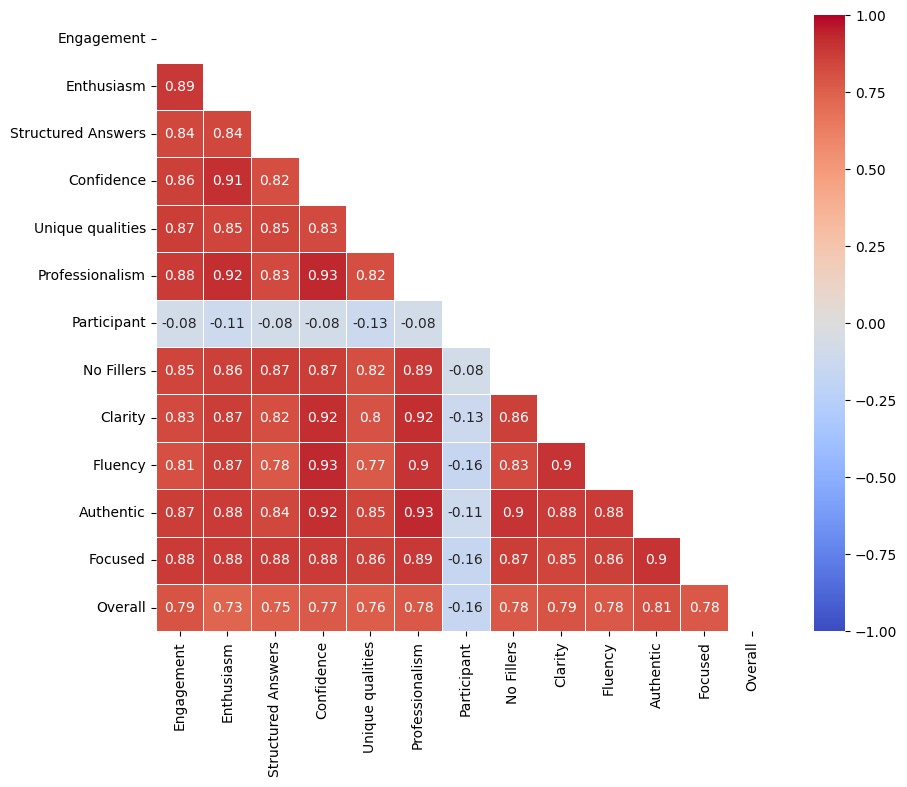

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(corr2, mask = matrix, annot=True, cmap='coolwarm', vmin = -1, vmax = 1, linewidth = 0.5 )
plt.show()